In [1]:
import glob 
from pathlib import Path
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
PATH = r'/Users/peaceforlives/Documents/Projects/cyberbullying/final_classification/results/'
data = pd.read_pickle(PATH+'data_docs.pkl')
data_docs = pd.read_pickle(PATH+'full_data.pkl')

In [3]:
cols = ['bullying_trace', 'bullying_role', 'form_of_bullying', 'bullying_post_type']
df = pd.concat([data_docs, data[cols]], axis=1)
df.loc[df['bullying_trace']=='no', 'bullying_trace'] = 'NA'
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)
df['date'] = [i.date() for i in df.index]
df['datestr'] = [i.date().strftime('%Y-%m-%d') for i in df.index]
df = df[df.datestr != '2020-04-01']
# df.tail()

In [4]:
b_trace = df[df['bullying_trace']=='yes']
# b_trace = b_trace[b_trace.datestr != '2020-02-21']
# b_trace = b_trace[b_trace.datestr != '2020-02-20']
# b_trace = b_trace[b_trace.datestr != '2020-02-22']
b_trace.shape

(239847, 16)

In [5]:
n_tweets_full = df['date'].groupby(df['date']).count()  # total by date
n_tweets = b_trace['date'].groupby(b_trace['date']).count()  # total by date

n =5
n_max = n_tweets.nlargest(n).sort_index()
n_max
x = n_max.index
y = n_max.values

y_max = y.max()
x_max = x[np.argmax(y)]
display(x_max, y_max)

datetime.date(2020, 2, 21)

6643

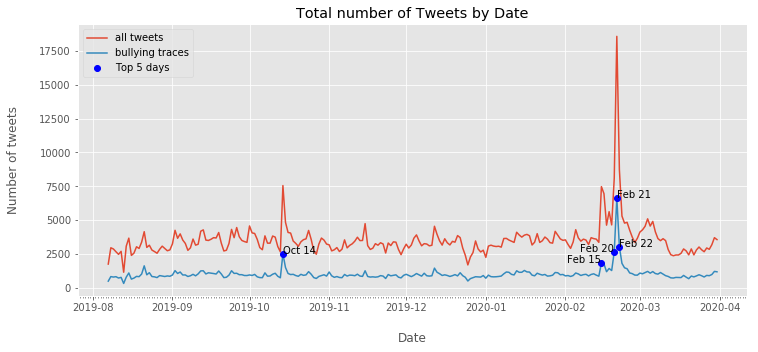

In [11]:
# years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
days = mdates.DayLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m')

plt.rcParams['figure.figsize'] = [12, 5]
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  

plt.plot(n_tweets_full, label='all tweets')
plt.plot(n_tweets, label='bullying traces')
plt.plot(n_max, 'ro', c='b', label='Top 5 days')   

pos = ['left','right','right','left','left']
for i, txt in enumerate(x):
    ax.annotate(txt.strftime('%b %d'), (x[i], y[i]), ha=pos[i])
    
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Total number of Tweets by Date")
plt.xticks()

# ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
plt.legend(loc='upper left', frameon=True)
plt.savefig('bullying_traces.pdf', bbox_inches='tight')

In [12]:
role = b_trace.groupby(["date","bullying_role"]).count()['id'].unstack()
post_type = b_trace.groupby(["date","bullying_post_type"]).count()['id'].unstack()
form = b_trace.groupby(["date","form_of_bullying"]).count()['id'].unstack()

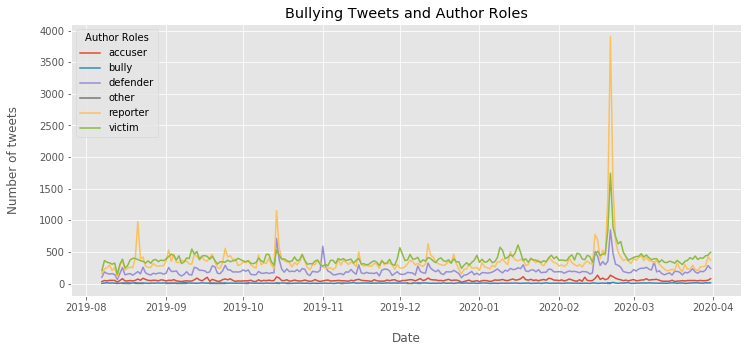

In [13]:
role.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Author Roles")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
# plt.yscale('log')
plt.legend(loc='upper left', frameon=True, title = 'Author Roles')
plt.savefig('author_roles.pdf', bbox_inches='tight')

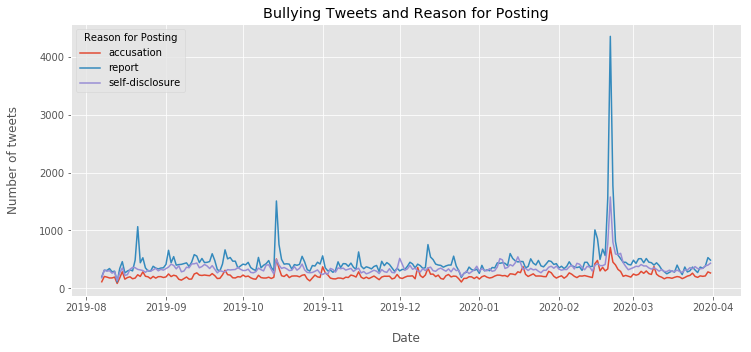

In [14]:
post_type.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Reason for Posting")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
# plt.yscale('log')
plt.legend(loc='upper left', frameon=True, title = 'Reason for Posting')
plt.savefig('reason_for_posting.pdf', bbox_inches='tight')

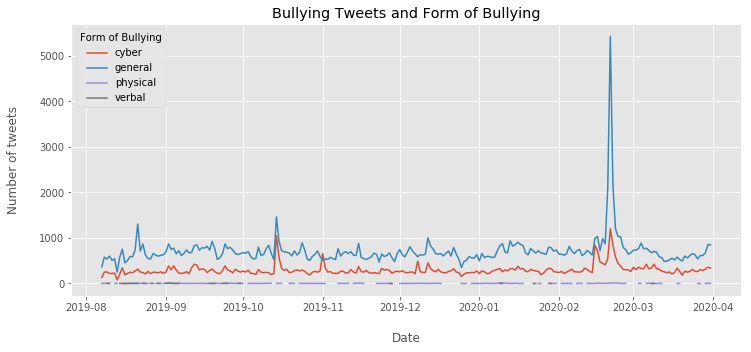

In [15]:
form.plot()
plt.xlabel("\nDate")
plt.ylabel("Number of tweets\n")
plt.title("Bullying Tweets and Form of Bullying")
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(days)
# plt.yscale('log')
plt.legend(loc='upper left', frameon=True, title = 'Form of Bullying')
plt.savefig('form_of_bullying.pdf', bbox_inches='tight')

In [17]:
# geo_data = data[data['timezone'].notnull()]
# geo_data.shape

In [88]:
pd.options.display.max_colwidth = 1000
geo_data.drop(['geo','coordinates','place','lang'], axis=1, inplace=True)
geo_data

//anaconda3/envs/twitter_cyberbullying/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,created_at,id,full_tweet,bullying_trace,bullying_role,form_of_bullying,bullying_post_type,timezone,localtime,state
438,2019-08-07 16:41:16+00:00,1159142476520673281,"devote your energy to something greater than yourself. you’ll undoubtedly be hated for it. you’ll be bullied, intimidated, called every name in the book and maybe even killed. but truth lasts and illusions fade. do… https://t.co/httiqpeimd",no,reporter,general,report,America/Los_Angeles,2019-08-07 09:41:16 PDT-0700,Oregon
1400,2019-08-07 21:54:53+00:00,1159221398172102656,https://t.co/dcgfsfxogy operation #dropoutjeep \nthey can control/intercept/reroute apple products communication like iphones and easily destroy lives with their #cyberbullying… https://t.co/hequxeqxus,no,accuser,cyber,report,America/Detroit,2019-08-07 17:54:53 EDT-0400,Michigan
1702,2019-08-07 23:38:51+00:00,1159247564081979392,performing live at @biglumusic \notg_fashawn bout to have the ground shaking! hit him up for tickets. all age event 🎯🔥🔥🔥\notg🖤\n3632 nw 25th st 33142\n(club bully) 10pm - 3am\nladies in free all night 💰\n•\n•\n@biglumusic… https://t.co/iylncn2lgm,no,reporter,general,report,America/New_York,2019-08-07 19:38:51 EDT-0400,Florida
3099,2019-08-08 12:02:41+00:00,1159434756318269441,"✔🆓️ parent workshop sat 8/10 - learn about online privacy, prevent cyberbullying and more... register: https://t.co/2a5yalypsn \ngetting ready for #backtoschool 🏫 ? @cityofdoral comcast are sponsoring… https://t.co/gqdbusbozf",no,reporter,cyber,report,America/New_York,2019-08-08 08:02:41 EDT-0400,Florida
4071,2019-08-08 20:05:03+00:00,1159556148153864192,#repost @mjcsolutions\n• • • • •\nthis offer is exclusive for you! \nonly $9.99 link in bio\n\n✔are you dealing with a toxic boss?\n✔is your boss a bully? \n✔are you the bully? \n\nenroll in this quick 28 minutes online… https://t.co/mjy3evjczd,no,defender,cyber,accusation,America/Los_Angeles,2019-08-08 13:05:03 PDT-0700,California
...,...,...,...,...,...,...,...,...,...,...
795255,2020-03-16 20:34:28+00:00,1239651266348843008,"don’t stand for republican bullying!!!! they still haven’t forced companies to stop making us come in for work, then they can’t force us not to get out and vote!!!! this is a republican ploy to stop us from kicking… https://t.co/w37vdbxifo",no,defender,general,report,America/New_York,2020-03-16 16:34:28 EDT-0400,Ohio
800017,2020-03-18 16:39:22+00:00,1240316877705891841,"it is with great sorrow that we announce we will temporary close until the current situation has receded.\n\nwe have tried to remain open in a safe manner however have had several people bully us online and in person,… https://t.co/wjq7y60m98",no,defender,cyber,report,America/Los_Angeles,2020-03-18 09:39:22 PDT-0700,California
824303,2020-03-27 14:13:56+00:00,1243541770924892162,https://t.co/5fjvchuuok has links to every movie i'm in that's available to watch online. this pic is from bully! just released this year! will you watch it pls? tell me what you think? it's available on basically every… https://t.co/jabj375neg,yes,victim,cyber,report,America/New_York,2020-03-27 10:13:56 EDT-0400,New Jersey
834979,2020-03-30 21:00:15+00:00,1244731185164480512,this is what my day has been. \nwho in the actual heck gave this girl the right to &amp; bully me through private messages on instagram &amp; facebook? i've been bullied my whole entire life &amp; words can hurt &amp; no one will… https://t.co/4vxxrc9cpy,yes,victim,general,self-disclosure,America/Chicago,2020-03-30 16:00:15 CDT-0500,Florida


In [106]:
geo_data['state'].value_counts().to_clipboard()

In [109]:
geo_data.groupby('state')['bullying_trace'].count()

state
Alabama              5
Alaska               1
Alberta              3
Arizona              4
British Columbia     2
California          44
Colorado             4
Connecticut          6
Delaware             2
Florida             19
Georgia              6
Illinois             4
Kansas               1
Kentucky             1
Louisiana            6
Manitoba             2
Maryland             5
Massachusetts        2
Michigan            11
Minnesota            1
Missouri             3
Montana              1
Nebraska             1
Nevada               4
New Jersey           3
New York            12
North Carolina       4
North Dakota         2
Nova Scotia          2
Ohio                 4
Ontario             22
Oregon               4
Pennsylvania        12
Québec              19
Saskatchewan         1
South Carolina       1
Tennessee            7
Texas               21
Utah                 2
Virginia             5
Washington           4
West Virginia        3
Wisconsin            2
Name:

In [118]:
geo_bully = geo_data[geo_data['bullying_trace']=='yes']
geo_bully.shape

(60, 10)

In [119]:
time = geo_bully.copy()
time = time[['bullying_trace','bullying_role','form_of_bullying','bullying_post_type','timezone','localtime']]
time.head()

,bullying_trace,bullying_role,form_of_bullying,bullying_post_type,timezone,localtime
16546,yes,victim,cyber,self-disclosure,America/Toronto,2019-08-13 06:29:41 EDT-0400
39524,yes,reporter,general,report,America/New_York,2019-08-21 09:56:26 EDT-0400
48072,yes,victim,general,self-disclosure,America/Los_Angeles,2019-08-23 18:12:49 PDT-0700
80390,yes,victim,general,self-disclosure,America/Los_Angeles,2019-09-03 10:48:19 PDT-0700
107754,yes,reporter,general,report,America/New_York,2019-09-11 18:19:16 EDT-0400


In [124]:
time['time'] = pd.to_datetime(time['localtime']) #, format='%d%b%Y:%H:%M:%S.%f')
time.head()

,bullying_trace,bullying_role,form_of_bullying,bullying_post_type,timezone,localtime,time
16546,yes,victim,cyber,self-disclosure,America/Toronto,2019-08-13 06:29:41 EDT-0400,2019-08-13 06:29:41-04:00
39524,yes,reporter,general,report,America/New_York,2019-08-21 09:56:26 EDT-0400,2019-08-21 09:56:26-04:00
48072,yes,victim,general,self-disclosure,America/Los_Angeles,2019-08-23 18:12:49 PDT-0700,2019-08-23 18:12:49+07:00
80390,yes,victim,general,self-disclosure,America/Los_Angeles,2019-09-03 10:48:19 PDT-0700,2019-09-03 10:48:19+07:00
107754,yes,reporter,general,report,America/New_York,2019-09-11 18:19:16 EDT-0400,2019-09-11 18:19:16-04:00


In [139]:
time['time'].value_counts().sort_index()